In [1]:
import librosa
print(librosa.__version__)

0.10.2.post1


# Data Exploration

In [10]:
import pandas as pd
df = pd.read_csv('Demographics_age_sex.csv')
df

,Sample ID,Label,Age,Sex
0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5,HC,69,M
1,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6,HC,43,M
2,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2,HC,18,F
3,AH_123G_559F0706-2238-447C-BA39-DB5933BA619D,HC,28,M
4,AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22,HC,68,M
...,...,...,...,...
76,AH_803T_66094C40-AE64-4AD3-AA97-B052C69DA3EF,HC,23,F
77,AH_821C_8F9D5EF0-18B2-4967-B36D-82E014792BC3,HC,35,F
78,AH_888A_7F1444B0-B12C-4B55-AF2A-463395DCAF3C,HC,61,M
79,AH_904H_85B22FC1-BA09-4A17-A374-B00B2445CD27,HC,36,F


/tmp/ipykernel_5974/3879764282.py:6: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  age_range_per_class_sex = grouped['Age'].agg([min, max, 'mean']).reset_index()
/tmp/ipykernel_5974/3879764282.py:6: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  age_range_per_class_sex = grouped['Age'].agg([min, max, 'mean']).reset_index()


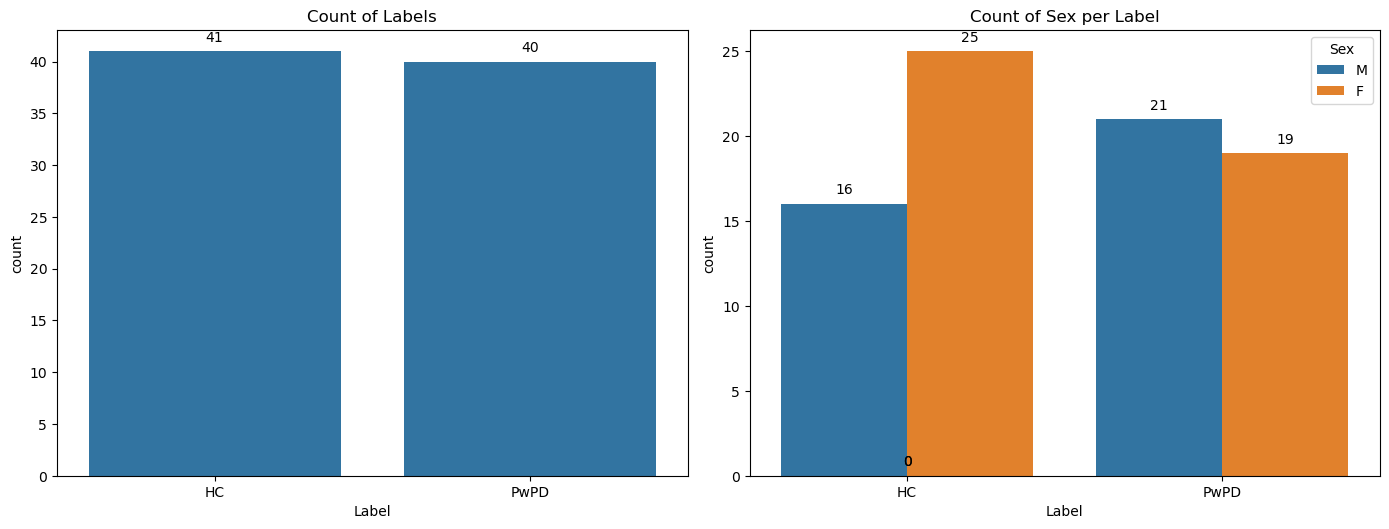

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recalculating the age range, max, and mean per label and sex
grouped = df.groupby(['Label', 'Sex'])
age_range_per_class_sex = grouped['Age'].agg([min, max, 'mean']).reset_index()

# Setting up the figure for EDA with age range and mean annotations
plt.figure(figsize=(14, 10))

# Plotting the count of labels with annotations
plt.subplot(2, 2, 1)
sns.countplot(x='Label', data=df)
plt.title('Count of Labels')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), textcoords = 'offset points')

# Plotting the count of sex per label with annotations
plt.subplot(2, 2, 2)
sns.countplot(x='Label', hue='Sex', data=df)
plt.title('Count of Sex per Label')
for p in plt.gca().patches:
    plt.gca().annotate(format(p.get_height(), '.0f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 10), textcoords = 'offset points')

plt.tight_layout()
plt.show()


/tmp/ipykernel_5974/2691258611.py:13: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  age_range_per_class_sex = grouped['Age'].agg([min, max, 'mean']).reset_index()
/tmp/ipykernel_5974/2691258611.py:13: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  age_range_per_class_sex = grouped['Age'].agg([min, max, 'mean']).reset_index()


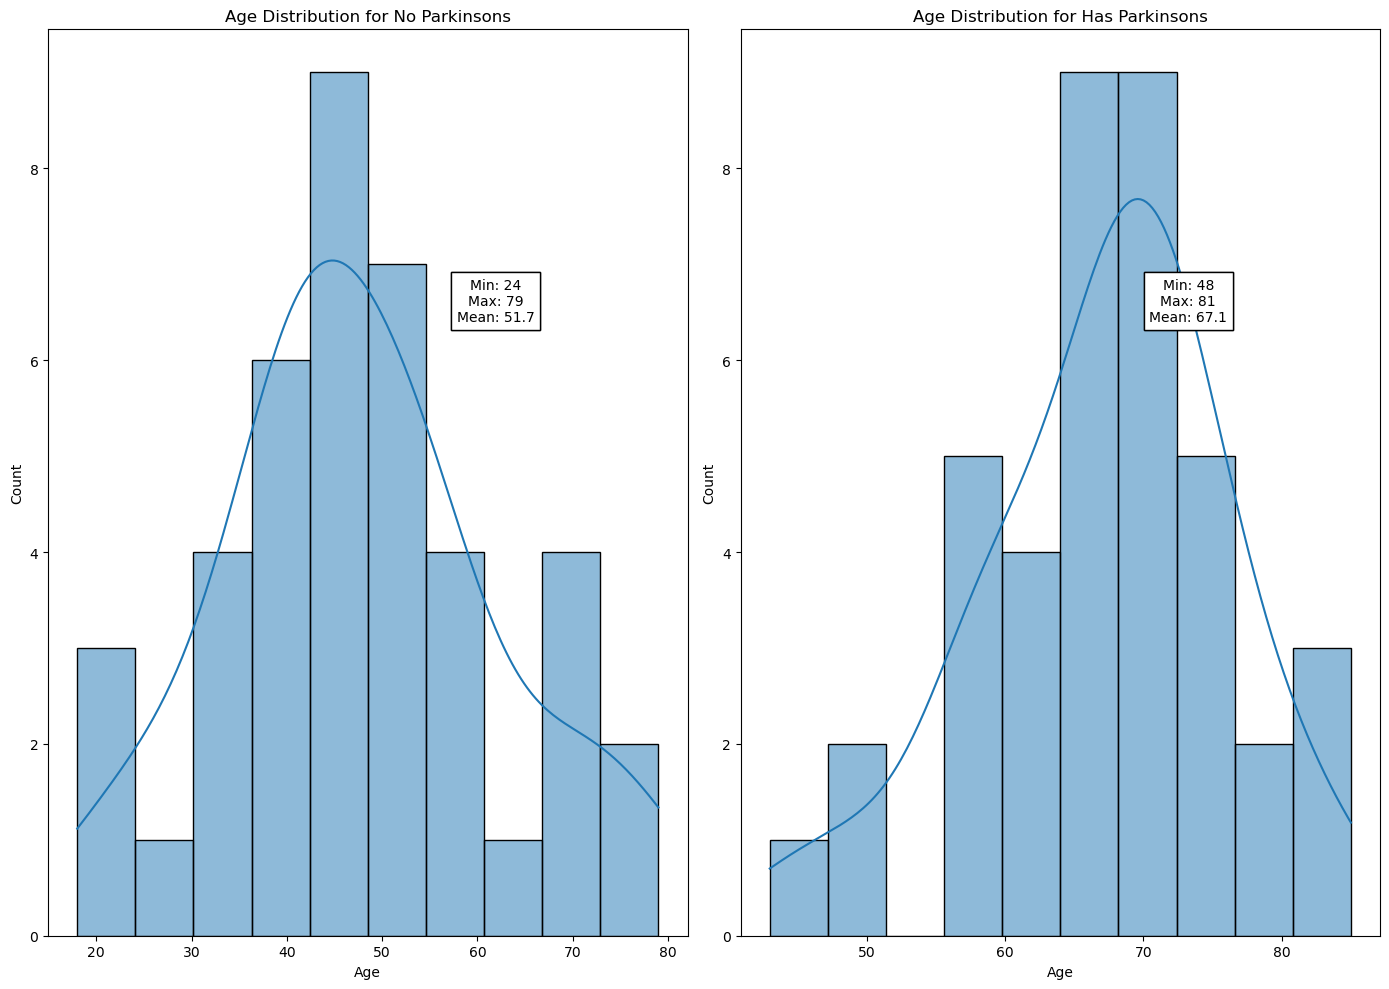

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset
df = pd.read_csv('Demographics_age_sex.csv')

# Renaming the labels
df['Label'] = df['Label'].replace({'HC': 'No Parkinsons', 'PwPD': 'Has Parkinsons'})

# Recalculating the age range, max, and mean per label and sex
grouped = df.groupby(['Label', 'Sex'])
age_range_per_class_sex = grouped['Age'].agg([min, max, 'mean']).reset_index()

# Setting up the figure for EDA with age range and mean annotations
plt.figure(figsize=(14, 10))

# Plotting the age distribution for No Parkinsons with annotations
plt.subplot(1, 2, 1)
sns.histplot(df[df['Label'] == 'No Parkinsons']['Age'], bins=10, kde=True)
plt.title('Age Distribution for No Parkinsons')
age_stats_no_parkinsons = age_range_per_class_sex[age_range_per_class_sex['Label'] == 'No Parkinsons']
for index, row in age_stats_no_parkinsons.iterrows():
    plt.gca().annotate(f"Min: {row['min']}\nMax: {row['max']}\nMean: {row['mean']:.1f}", 
                       (0.7, 0.7), xycoords='axes fraction', 
                       ha='center', va='center', 
                       bbox=dict(facecolor='white', edgecolor='black'))

# Plotting the age distribution for Has Parkinsons with annotations
plt.subplot(1, 2, 2)
sns.histplot(df[df['Label'] == 'Has Parkinsons']['Age'], bins=10, kde=True)
plt.title('Age Distribution for Has Parkinsons')
age_stats_has_parkinsons = age_range_per_class_sex[age_range_per_class_sex['Label'] == 'Has Parkinsons']
for index, row in age_stats_has_parkinsons.iterrows():
    plt.gca().annotate(f"Min: {row['min']}\nMax: {row['max']}\nMean: {row['mean']:.1f}", 
                       (0.7, 0.7), xycoords='axes fraction', 
                       ha='center', va='center', 
                       bbox=dict(facecolor='white', edgecolor='black'))

plt.tight_layout()
plt.show()


# Preprocessing

These following cells assume the dataset was extracted and placed in `data/audios_`, with a folder per class.

## Data Splitting

### Five Fold Split, for replication study (70-30%)

In [9]:
import os
import shutil
import random

# Define paths
data_dir = 'data/audios_'
splits_dir = os.path.join('splits')

# Create main splits directory if it doesn't exist
os.makedirs(splits_dir, exist_ok=True)

# Get class directories
class_directories = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Number of splits
num_splits = 5

# Create 5 splits
for split_index in range(1, num_splits + 1):
    # Define split-specific train and test directories
    split_train_dir = os.path.join(splits_dir, f'split_{split_index}', 'train')
    split_test_dir = os.path.join(splits_dir, f'split_{split_index}', 'test')

    # Create directories if they don't exist
    os.makedirs(split_train_dir, exist_ok=True)
    os.makedirs(split_test_dir, exist_ok=True)

    # Split data (70% train, 30% test) for each class directory
    for class_dir in class_directories:
        images = [f for f in os.listdir(class_dir) if f.endswith('.wav')]
        random.shuffle(images)
        num_train = int(0.85 * len(images))  # 70% for training

        train_images = images[:num_train]
        test_images = images[num_train:]

        # Define class-specific directories in the split
        class_name = os.path.basename(class_dir)
        split_class_train_dir = os.path.join(split_train_dir, class_name)
        split_class_test_dir = os.path.join(split_test_dir, class_name)

        # Create class-specific directories
        os.makedirs(split_class_train_dir, exist_ok=True)
        os.makedirs(split_class_test_dir, exist_ok=True)

        # Copy images to respective directories
        for img in train_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(split_class_train_dir, img)
            shutil.copy(src, dst)

        for img in test_images:
            src = os.path.join(class_dir, img)
            dst = os.path.join(split_class_test_dir, img)
            shutil.copy(src, dst)

print("Data splitting complete!")


Data splitting complete!


### 10-Fold Split, for holdout study (70-15-15%)

In [98]:
import os
import shutil
import random
from sklearn.model_selection import train_test_split

# Define paths
data_dir = 'data/audios_'
splits_dir = 'splits_10'

# Create main splits directory if it doesn't exist
os.makedirs(splits_dir, exist_ok=True)

# Get class directories
class_directories = [os.path.join(data_dir, d) for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]

# Number of splits
num_splits = 10

# Create 10 splits
for split_index in range(1, num_splits + 1):
    # Define split-specific train, val, and test directories
    split_dir = os.path.join(splits_dir, f'split_{split_index}')
    split_train_dir = os.path.join(split_dir, 'train')
    split_val_dir = os.path.join(split_dir, 'val')
    split_test_dir = os.path.join(split_dir, 'test')

    # Create directories if they don't exist
    os.makedirs(split_train_dir, exist_ok=True)
    os.makedirs(split_val_dir, exist_ok=True)
    os.makedirs(split_test_dir, exist_ok=True)

    # Split data for each class directory
    for class_dir in class_directories:
        wav_files = [f for f in os.listdir(class_dir) if f.endswith('.wav')]
        random.shuffle(wav_files)

        # Initial train/test split (85/15)
        train_val_files, test_files = train_test_split(wav_files, test_size=0.15)  

        # Further split train_val into train/val (70/15 of the original data)
        train_files, val_files = train_test_split(train_val_files, test_size=0.15/0.85)

        # Define class-specific directories in the split
        class_name = os.path.basename(class_dir)
        split_class_train_dir = os.path.join(split_train_dir, class_name)
        split_class_val_dir = os.path.join(split_val_dir, class_name)
        split_class_test_dir = os.path.join(split_test_dir, class_name)

        # Create class-specific directories
        os.makedirs(split_class_train_dir, exist_ok=True)
        os.makedirs(split_class_val_dir, exist_ok=True)
        os.makedirs(split_class_test_dir, exist_ok=True)

        # Copy files to respective directories
        for file_list, destination_dir in zip(
            [train_files, val_files, test_files], 
            [split_class_train_dir, split_class_val_dir, split_class_test_dir]
        ):
            for filename in file_list:
                src = os.path.join(class_dir, filename)
                dst = os.path.join(destination_dir, filename)
                shutil.copy(src, dst)

print("Data splitting complete!")


Data splitting complete!


## Generate Spectrograms

In [101]:
import os
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import soundfile as sf

def trim_silence(data, fs):
    # Calculate short-time energy
    window_width = int(0.0125 * fs)  # 12.5 ms window
    energy = np.convolve(data**2, np.ones(window_width), mode='same')
    
    # Find the start and end indices of non-silent regions
    start_index = np.argmax(energy > np.max(energy) * 0.05)  # Adjust threshold as needed
    end_index = len(data) - np.argmax(energy[::-1] > np.max(energy) * 0.05)
    
    return data[start_index:end_index]

def generate_spectrogram(wav_file, output_file, is_male=True):
    # Read the audio file
    data, fs = sf.read(wav_file)
    
    # Apply noise removal and rescaling
    if is_male:
        data = np.clip(data, -10**(75/20), 10**(300/20))  # Floor and ceiling values for males
    else:
        data = np.clip(data, -10**(100/20), 10**(600/20))  # Floor and ceiling values for females
    
    # Rescale to the range [-1, 1]
    data = np.clip(data, -1, 1)
    
    # Trim silence using short-time energy
    trimmed_data = trim_silence(data, fs)
    
    # Check if the length after trimming is at least 1.5s
    if len(trimmed_data) / fs < 1.5:
        print("Recording is shorter than 1.5s after trimming silent parts. Omitting from analysis.")
        return
    
    # Take only the first 1.5s of the trimmed data
    trimmed_data = trimmed_data[:int(1.5 * fs)]
    
    # Generate spectrogram
    f, t, Sxx = signal.spectrogram(trimmed_data, fs=fs, window='hann', nperseg=int(0.032 * fs), noverlap=int(0.016 * fs), nfft=1024)
    
    # Convert to decibels
    Sxx_db = 10 * np.log10(np.abs(Sxx) / np.max(np.abs(Sxx)))
    
    # Check if the output folder exists, create it if not
    output_folder = os.path.dirname(output_file)
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Plot spectrogram without axes and borders
    plt.figure(figsize=(6, 6))
    plt.axis('off')
    plt.pcolormesh(t, f, Sxx_db, shading='gouraud')
    plt.tight_layout()
    
    # Save the spectrogram as a jpg file
    plt.savefig(output_file, format='jpg', bbox_inches='tight', pad_inches=0, dpi=600)
    
    # Close the plot to prevent accumulation
    plt.close()

# Example usage
generate_spectrogram('example.wav', 'output/spectrogram.jpg', is_male=True)


## Create Datasets

In [102]:
import os
import pandas as pd
import os
import pandas as pd
import numpy as np
import soundfile as sf 

def get_gender(sample_id, demographics_df):
    """
    Get the gender from the demographics dataframe based on the sample ID.
    """
    row = demographics_df[demographics_df['Sample ID'] == sample_id]
    gender = row['Sex'].values[0] if not row.empty else None
    return gender

def process_wav_files(input_folder, output_folder, demographics_df):
    """
    Process .wav files, generate spectrograms, and save them in the output folder preserving the folder structure.
    """
    for root, dirs, files in os.walk(input_folder):
        for file in files:
            if file.endswith(".wav"):
                input_path = os.path.join(root, file)
                output_path = input_path.replace(input_folder, output_folder).replace(".wav", ".jpg")
                
                # Extract sample ID from the filename
                sample_id = os.path.splitext(file)[0]
                
                # Get gender information from the demographics dataframe
                gender = get_gender(sample_id, demographics_df)
                
                # Generate spectrogram
                generate_spectrogram(input_path, output_path, is_male=(gender=='M'))

# Load demographics data
demographics_df = pd.read_csv("Demographics_age_sex.csv")

# Define input and output folders
input_folder = "splits_10"
output_folder = "10_spectro_splits"

# Process .wav files
process_wav_files(input_folder, output_folder, demographics_df)


## Cross Validation

### On Five Splits

In [5]:
import timm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import gc
import os
import numpy as np

def train_and_evaluate_model(data_directory, base_model_name, use_augmentation, num_epochs=1000, batch_size=4, patience=10, lr=1e-4, weight_decay=1e-4):
    if use_augmentation:
        train_transform = transforms.Compose([
            transforms.Resize((384, 384)),
            transforms.RandomHorizontalFlip(p=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.485, 0.456, 0.406])
        ])
    else:
        train_transform = transforms.Compose([
            transforms.Resize((384, 384)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.485, 0.456, 0.406])
        ])
    
    transform = transforms.Compose([
        transforms.Resize((384, 384)), 
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.485, 0.456, 0.406]) 
    ])
    
    # Data Loaders
    train_dataset = datasets.ImageFolder(f"{data_directory}/train", transform=train_transform)
    test_dataset = datasets.ImageFolder(f"{data_directory}/test", transform=transform)
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    model = timm.create_model(base_model_name, pretrained=True) 

    # Determine the number of input features for the classification head
    if hasattr(model, 'fc'):
        in_features = model.fc.in_features
        model.fc = nn.Identity()
    elif hasattr(model, 'classifier'):
        in_features = model.classifier.in_features
        model.classifier = nn.Identity()
    elif hasattr(model, 'head'):
        in_features = model.head.in_features
        model.head = nn.Identity()
    elif hasattr(model, 'last_linear'):
        in_features = model.last_linear.in_features
        model.last_linear = nn.Identity()
    else:
        raise AttributeError(f"Model {base_model_name} does not have a recognized classification head")

    # New Head
    class NewHead(nn.Module):
        def __init__(self, in_features):
            super(NewHead, self).__init__()
            self.fc1 = nn.Linear(in_features, 1024)
            self.relu = nn.ReLU()
            self.dropout = nn.Dropout(0.5)
            self.fc2 = nn.Linear(1024, 1)  # Output layer for binary classification

        def forward(self, x):
            if x.dim() == 4:
                x = torch.flatten(x, 1)  # Flatten the 4D tensor to 2D
                x = nn.BatchNorm1d(x.size(1)).to(x.device)(x)  # Apply 1D batch norm
            else:
                x = nn.BatchNorm1d(x.size(1)).to(x.device)(x)  # Apply 1D batch norm
            x = self.fc1(x)
            x = self.relu(x)
            x = self.dropout(x)
            x = self.fc2(x)
            return x
    
    # Assign the new head
    if hasattr(model, 'fc'):
        model.fc = NewHead(in_features)
    elif hasattr(model, 'classifier'):
        model.classifier = NewHead(in_features)
    elif hasattr(model, 'head'):
        model.head = NewHead(in_features)
    elif hasattr(model, 'last_linear'):
        model.last_linear = NewHead(in_features)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    # Fine-tuning strategy depending on the base model
    if "vit" in base_model_name:
        # Fine-tune only the classification head
        for name, param in model.named_parameters():
            if "head" in name or "blocks.11" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    elif "efficientnet" in base_model_name:
        # Fine-tune only the classification head and some of the final layers
        for name, param in model.named_parameters():
            if "classifier" in name or "blocks.23" in name or "blocks.24" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    elif "swin" in base_model_name:
        # Fine-tune only the classification head and some of the final layers
        for name, param in model.named_parameters():
            if "head" in name or "layers.7" in name or "layers.8" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    elif "deit" in base_model_name:
        # Fine-tune only the classification head and some of the final layers
        for name, param in model.named_parameters():
            if "head" in name or "layers.11" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    elif "inception" in base_model_name:
        # Fine-tune only the classification head and some of the final layers
        for name, param in model.named_parameters():
            if "last_linear" in name or "AuxLogits.fc" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    elif "convit" in base_model_name or "nfnet" in base_model_name:
        # Fine-tune only the classification head
        for name, param in model.named_parameters():
            if "head" in name or "classifier" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    
    # Loss, Optimizer, and Scheduler
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.RMSprop(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)
    
    best_val_auc = 0.0
    
    for epoch in range(num_epochs):
        model.train()
        train_probs = []
        train_labels = []
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            labels = labels.unsqueeze(1).float()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            probs = torch.sigmoid(outputs)
            train_probs.extend(probs.detach().cpu().numpy())
            train_labels.extend(labels.cpu().numpy())
    
        train_preds = [1 if p >= 0.5 else 0 for p in train_probs]
        train_acc = accuracy_score(train_labels, train_preds)
        train_auc = roc_auc_score(train_labels, train_probs)
    
        model.eval()
        val_probs = []
        val_labels = []
        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                probs = torch.sigmoid(outputs)
                val_probs.extend(probs.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        val_auc = roc_auc_score(val_labels, val_probs)
        val_preds = [1 if p >= 0.5 else 0 for p in val_probs]
        val_acc = accuracy_score(val_labels, val_preds)
        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Accuracy: {train_acc:.4f}, Train AUC: {train_auc:.4f}, Val Accuracy: {val_acc:.4f}, Val AUC: {val_auc:.4f}")
    
        if val_auc > best_val_auc:
            best_val_auc = val_auc
            best_model_filename = f"best_model_{base_model_name}.pth"
            torch.save(model.state_dict(), best_model_filename)
            patience_counter = 0
        else:
            patience_counter += 1
            if patience_counter >= patience:
                print("Early stopping!")
                break
    
        scheduler.step()
    
    # Load Best Model and Test
    model.load_state_dict(torch.load(best_model_filename))
    model.eval()
    test_preds = []
    test_labels = []
    test_probs = []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.sigmoid(outputs)
            test_probs.extend(probs.cpu().numpy())
            test_labels.extend(labels.cpu().numpy())
    
    test_preds = [1 if p >= 0.5 else 0 for p in test_probs]
    
    test_acc = accuracy_score(test_labels, test_preds)
    test_auc = roc_auc_score(test_labels, test_probs)
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test AUC: {test_auc:.4f}")
    print(classification_report(test_labels, test_preds, target_names=["HC", "PD"]))
    
    # Free GPU memory
    model.cpu()
    torch.cuda.empty_cache()
    gc.collect()
    
    return test_acc, test_auc

In [ ]:
import os
import numpy as np

splits_directory = 'splits_spectrograms'
splits = [os.path.join(splits_directory, split) for split in os.listdir(splits_directory) if os.path.isdir(os.path.join(splits_directory, split))]

models = ['vit_tiny_r_s16_p8_384']

results = []

for use_augmentation in [False]:  
    augmentation_results = []
    for model_name in models:
        model_results = []
        for split in splits:  
            print("Augmentation:", use_augmentation, "| Model:", model_name, "| Split:", split)
            test_acc, test_auc = train_and_evaluate_model(split, model_name, use_augmentation)
            model_results.append((test_acc, test_auc))
        augmentation_results.append(model_results)
    results.append(augmentation_results)

### On 10 Splits (70/15/15)

In [124]:
import timm
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import gc
import os
import numpy as np
from torch.optim.lr_scheduler import CosineAnnealingLR, LambdaLR
import json
from sklearn.ensemble import RandomForestClassifier


def train_and_evaluate_model(data_directory, base_model_name, use_augmentation, num_epochs=1000, batch_size=4, patience=10, lr=1e-4, weight_decay=1e-4):
    if use_augmentation:
        train_transform = transforms.Compose([
            transforms.Resize((384, 384)),
            transforms.RandomHorizontalFlip(p=0.2),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.485, 0.456, 0.406])
        ])
    else:
        train_transform = transforms.Compose([
            transforms.Resize((384, 384)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.485, 0.456, 0.406])
        ])

    transform = transforms.Compose([
        transforms.Resize((384, 384)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.485, 0.456, 0.406])
    ])

    # Data Loaders
    train_dataset = datasets.ImageFolder(f"{data_directory}/train", transform=train_transform)
    val_dataset = datasets.ImageFolder(f"{data_directory}/val", transform=transform)  # Validation set
    holdout_dataset = datasets.ImageFolder(f"{data_directory}/test", transform=transform) # Holdout set

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)  # No shuffling for validation
    holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=True)
    
    model = timm.create_model(base_model_name, pretrained=True) 

    # Determine the number of input features for the classification head
    if hasattr(model, 'fc'):
        in_features = model.fc.in_features
        model.fc = nn.Identity()
    elif hasattr(model, 'classifier'):
        in_features = model.classifier.in_features
        model.classifier = nn.Identity()
    elif hasattr(model, 'head'):
        in_features = model.head.in_features
        model.head = nn.Identity()
    elif hasattr(model, 'last_linear'):
        in_features = model.last_linear.in_features
        model.last_linear = nn.Identity()
    else:
        raise AttributeError(f"Model {base_model_name} does not have a recognized classification head")

    # New Head
    class NewHead(nn.Module):
        def __init__(self, in_features):
            super(NewHead, self).__init__()
            self.bn = nn.BatchNorm1d(num_features=in_features)
            self.fc1 = nn.Linear(in_features, 1024)
            self.dropout = nn.Dropout(0.5)
            self.fc2 = nn.Linear(1024, 1)

        def forward(self, x):
            x = self.bn(x)
            x = self.fc1(x)
            x = self.dropout(x)
            x = self.fc2(x)
            return x
    
    # Assign the new head
    if hasattr(model, 'fc'):
        model.fc = NewHead(in_features)
    elif hasattr(model, 'classifier'):
        model.classifier = NewHead(in_features)
    elif hasattr(model, 'head'):
        model.head = NewHead(in_features)
    elif hasattr(model, 'last_linear'):
        model.last_linear = NewHead(in_features)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    if "vit" in base_model_name:
        # Fine-tune the classification head and the top two blocks
        for name, param in model.named_parameters():
            if "head" in name or "blocks.11" in name:  # Added "blocks.10"
                param.requires_grad = True
            else:
                param.requires_grad = False 

    elif "efficientnet" in base_model_name:
        # Fine-tune only the classification head and some of the final layers
        for name, param in model.named_parameters():
            if "classifier" in name or "blocks.23" in name or "blocks.24" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    elif "swin" in base_model_name:
        # Fine-tune only the classification head and some of the final layers
        for name, param in model.named_parameters():
            if "head" in name or "layers.7" in name or "layers.8" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    elif "deit" in base_model_name:
        # Fine-tune only the classification head and some of the final layers
        for name, param in model.named_parameters():
            if "head" in name or "layers.11" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    elif "inception" in base_model_name:
        # Fine-tune only the classification head and some of the final layers
        for name, param in model.named_parameters():
            if "last_linear" in name or "AuxLogits.fc" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    elif "convit" in base_model_name or "nfnet" in base_model_name:
        # Fine-tune only the classification head
        for name, param in model.named_parameters():
            if "head" in name or "classifier" in name:
                param.requires_grad = True
            else:
                param.requires_grad = False
    
        # Loss and Optimizer
    criterion = nn.BCEWithLogitsLoss()
    
    optimizer = optim.Adam(
        filter(lambda p: p.requires_grad, model.parameters()), 
        lr=1e-3,  # Faster learning rate
        weight_decay=1e-4
    )
    
    best_val_auc = 0.0
    patience_counter = 0
    
    for epoch in range(num_epochs):
        model.train()
        train_probs = []
        train_labels = []
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            labels = labels.unsqueeze(1).float()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            probs = torch.sigmoid(outputs)
            train_probs.extend(probs.detach().cpu().numpy())
            train_labels.extend(labels.cpu().numpy())
    
        train_preds = [1 if p >= 0.5 else 0 for p in train_probs]
        train_acc = accuracy_score(train_labels, train_preds)
        train_auc = roc_auc_score(train_labels, train_probs)
    
        model.eval()
        val_probs = []
        val_labels = []
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                probs = torch.sigmoid(outputs)
                val_probs.extend(probs.cpu().numpy())
                val_labels.extend(labels.cpu().numpy())
        val_auc = roc_auc_score(val_labels, val_probs)
        val_preds = [1 if p >= 0.5 else 0 for p in val_probs]
        val_acc = accuracy_score(val_labels, val_preds)

        # print(np.array(val_probs).flatten())
        
        print(f"Epoch {epoch+1}/{num_epochs}, Train Accuracy: {train_acc:.4f}, Train AUC: {train_auc:.4f}, Val Accuracy: {val_acc:.4f}, Val AUC: {val_auc:.4f}")
    
        if val_auc > best_val_auc and val_auc <= train_auc:
            best_val_auc = val_auc
            best_model_filename = f"best_model_{base_model_name}.pth"
            torch.save(model.state_dict(), best_model_filename)
            patience_counter = 0  # Reset patience counter when a better model is found
        else:
            if epoch >= 4:  
                patience_counter += 1  
                print(f"Patience: {patience_counter}")# Always increment when not improving, even if it was 0
                if patience_counter >= patience:
                    print("Early stopping!")
                    break
    
    model.load_state_dict(torch.load(best_model_filename))
    model.eval()
    holdout_probs = []
    holdout_labels = []
    with torch.no_grad():
        for images, labels in holdout_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probs = torch.sigmoid(outputs)
            holdout_probs.extend(probs.cpu().numpy())
            holdout_labels.extend(labels.cpu().numpy())
    
    holdout_auc = roc_auc_score(holdout_labels, holdout_probs)
    holdout_preds = [1 if p >= 0.5 else 0 for p in holdout_probs]
    holdout_acc = accuracy_score(holdout_labels, holdout_preds)

    print(holdout_probs)
    print(holdout_preds)
    print(holdout_labels)

    print("\nHoldout Set Metrics:")
    print(f"Accuracy: {holdout_acc:.4f}, AUC: {holdout_auc:.4f}")

    return holdout_acc, holdout_auc

In [125]:
import os
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

splits_directory = '10_spectro_splits'
splits = [os.path.join(splits_directory, split) for split in os.listdir(splits_directory) if os.path.isdir(os.path.join(splits_directory, split))]

models = ['vit_tiny_r_s16_p8_384']

results = []

for use_augmentation in [False]:  
    augmentation_results = []
    for model_name in models:
        model_results = []
        for split in splits:  
            print("Augmentation:", use_augmentation, "| Model:", model_name, "| Split:", split)
            test_acc, test_auc = train_and_evaluate_model(split, model_name, use_augmentation)
            model_results.append((test_acc, test_auc))
        augmentation_results.append(model_results)
    results.append(augmentation_results)

Augmentation: False | Model: vit_tiny_r_s16_p8_384 | Split: 10_spectro_splits/split_1
Epoch 1/1000, Train Accuracy: 0.5357, Train AUC: 0.6110, Val Accuracy: 0.5833, Val AUC: 0.6944
Epoch 2/1000, Train Accuracy: 0.7679, Train AUC: 0.8355, Val Accuracy: 0.6667, Val AUC: 1.0000
Epoch 3/1000, Train Accuracy: 0.8036, Train AUC: 0.9260, Val Accuracy: 0.6667, Val AUC: 1.0000
Epoch 4/1000, Train Accuracy: 0.8929, Train AUC: 0.9732, Val Accuracy: 0.8333, Val AUC: 1.0000
Epoch 5/1000, Train Accuracy: 0.8393, Train AUC: 0.9503, Val Accuracy: 0.9167, Val AUC: 0.9444
Epoch 6/1000, Train Accuracy: 0.8393, Train AUC: 0.9311, Val Accuracy: 1.0000, Val AUC: 1.0000
Patience: 1
Epoch 7/1000, Train Accuracy: 0.8214, Train AUC: 0.9337, Val Accuracy: 0.8333, Val AUC: 1.0000
Patience: 2
Epoch 8/1000, Train Accuracy: 0.8929, Train AUC: 0.9579, Val Accuracy: 0.9167, Val AUC: 1.0000
Patience: 3
Epoch 9/1000, Train Accuracy: 0.8929, Train AUC: 0.9069, Val Accuracy: 1.0000, Val AUC: 1.0000
Patience: 4
Epoch 10/10

In [126]:
results

[[[(0.6923076923076923, 0.6666666666666667),
   (0.6153846153846154, 0.9047619047619047),
   (0.7692307692307693, 0.9285714285714286),
   (0.7692307692307693, 0.7857142857142857),
   (0.8461538461538461, 0.8095238095238095),
   (0.6153846153846154, 0.6428571428571428),
   (0.46153846153846156, 0.6428571428571428),
   (0.7692307692307693, 0.8095238095238095),
   (0.6923076923076923, 0.5952380952380952),
   (0.7692307692307693, 0.8571428571428572)]]]

In [129]:
# Flatten the list to access the tuples directly
flattened_data = results[0][0]

# Extract the first and second elements from the tuples
first_elements = np.array([item[0] for item in flattened_data])
second_elements = np.array([item[1] for item in flattened_data])

# Calculate mean and standard deviation
mean_first = np.mean(first_elements)
std_first = np.std(first_elements)
mean_second = np.mean(second_elements)
std_second = np.std(second_elements)

print("Accuracy:")
print("Mean:", mean_first)
print("Standard Deviation:", std_first)
print("\AUC:")
print("Mean:", mean_second)
print("Standard Deviation:", std_second)

Accuracy:
Mean: 0.7
Standard Deviation: 0.10575174680667324
\AUC:
Mean: 0.7642857142857142
Standard Deviation: 0.11291338763218454
